In [31]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [58]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [59]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
### select training data and identify label
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1) 
x=df.iloc[0:100,[0,2]].values

In [80]:
###now we define the necessary functions, especiall the fit()
class Perceptron():
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
 
    def fit(self, x, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples
            is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.
        Returns
           -------
        self : object
           """
        self.w_ = np.zeros(1 + x.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, x):
        """Calculate net input"""
        return np.dot(x, self.w_[1:]) + self.w_[0]
    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.net_input(x) >= 0.0, 1, -1)    
        

In [81]:
pctrn = Perceptron(n_iter=10, eta=0.1)

In [82]:
pctrn.fit(x,y)

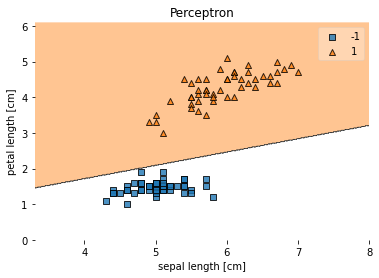

In [83]:
plot_decision_regions(x, y, clf=pctrn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

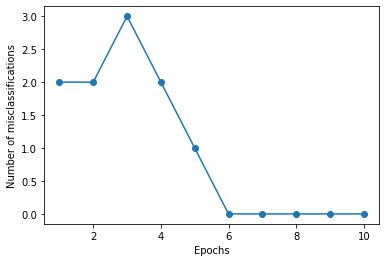

In [84]:
plt.plot(range(1,len(pctrn.errors_)+1),pctrn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()